# **Business** **Problem**
**Problem** **Statement**:

Healthcare providers face challenges in prescribing the correct medication and dosage for patients with hypertension. Mismanagement in drug prescriptions can lead to ineffective treatment, adverse drug reactions, and increased healthcare costs. With a vast array of antihypertensive medications and varying patient conditions, ensuring optimal prescriptions is complex and error-prone.

**Objective**:

To enhance the accuracy and effectiveness of hypertension drug prescriptions by leveraging machine learning to provide personalized recommendations based on patient data and clinical guidelines.

**Aims**

1. As a medical researcher, I have data for a study from Kaggle that have the collected data about a set of patients, all of whom suffered from the same illness(High blood pressure). During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

2. Using the Data Set, the aim is to generate a model that will predict appropriate drug for prospoective patients. The featurs of the data set include
 Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

3. The primary aim is to use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

# **Problem** **Analysis** **Process**
To build a multiclass classifier using a decision tree for predicting the most appropriate drug for a patient based on their features, these steps will be followed:

1. **Data** **Preparation**

Ensure that the kaggle dataset is clean and complete. For each patient, there  should be the values for Age, Sex, Blood Pressure, Cholesterol, and the corresponding Drug that they responded to.

**1.2** **Encode** **Categorical** **Variables**:

Convert categorical features (e.g., Sex) into numerical values using techniques like one-hot encoding or label encoder

**1.3** **Data** **Correlation**:

Calculate and visualize the correlation matrix to understand relationships between features. Data Preparation:


**1.4** **Split** **the** **Data** **and** **train**

a. Divide the kaggle  dataset into training and testing subsets. Typically, we will use 70-80% of the data for training and the remaining 20-30% for testing.

b. Define features and target variables. Encode the target variable for multiclass classification. Split the data into training and testing sets. (Optional) Standardize features to improve model performance. Train Decision Tree Classifier:

c. Initialize and train the decision tree model using the training data. Make Predictions and Evaluate Model:

d. Make predictions on the test set. Evaluate model performance using accuracy and classification report. Interpret the Decision Tree:

e. Print the decision tree rules to understand the decision-making process.

# **Data** **Viewing** **to** **Understand** **the** **Data**

In [81]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [82]:
#loading the  data
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

In [83]:
#Exploring the top 5 dataframe
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [84]:
#Exploring the data's statistics
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Only two columns analyzed statistically as the other three columns contains categorical data

In [85]:
#Exploring the data frame's columns and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [86]:
#Exploring the data structure and Frame
df.shape

(200, 6)

In [87]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# **Data** **Cleaning** **and** **Data** **Handling**

In [88]:
#Checking for missing values
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


There are no missing values

In [89]:
#Check for duplicates
df.duplicated().sum()

0

There are no duplicates

In [90]:
#Confirming the dataframe colums and dtypes
df.columns
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


To prepare the data for machine learning, we need to convert categorical columns (e.g., Sex, BP, Cholesterol, Drug) to numerical values. However, numerical columns (e.g., Age, Na_to_K) can be used directly.


In [91]:
# To find unique values in each column of the DataFrame, we can iterate over the columns:

columns = df.columns
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")
    print()


Unique values in column 'Age': [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Unique values in column 'Sex': ['F' 'M']

Unique values in column 'BP': ['HIGH' 'LOW' 'NORMAL']

Unique values in column 'Cholesterol': ['HIGH' 'NORMAL']

Unique values in column 'Na_to_K': [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 

In [92]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [93]:
df.isna().sum

<bound method DataFrame.sum of        Age    Sex     BP  Cholesterol  Na_to_K   Drug
0    False  False  False        False    False  False
1    False  False  False        False    False  False
2    False  False  False        False    False  False
3    False  False  False        False    False  False
4    False  False  False        False    False  False
..     ...    ...    ...          ...      ...    ...
195  False  False  False        False    False  False
196  False  False  False        False    False  False
197  False  False  False        False    False  False
198  False  False  False        False    False  False
199  False  False  False        False    False  False

[200 rows x 6 columns]>

# **Understanding** **Encoded** **Values** **for** **Categorical** **Data**

It is important to understand the relationship between categorical values and their encoded numerical representations. In this case, we can create a mapping that shows each original categorical value and its corresponding encoded integer value.

In [94]:


# Create mappings
drug_mapping = pd.Categorical(df['Drug']).categories
sex_mapping = pd.Categorical(df['Sex']).categories
bp_mapping = pd.Categorical(df['BP']).categories
cholesterol_mapping = pd.Categorical(df['Cholesterol']).categories

# Convert to dictionaries for easier lookup
drug_mapping_dict = dict(enumerate(drug_mapping))
sex_mapping_dict = dict(enumerate(sex_mapping))
bp_mapping_dict = dict(enumerate(bp_mapping))
cholesterol_mapping_dict = dict(enumerate(cholesterol_mapping))

# Print mappings
print("Drug Mapping:", drug_mapping_dict)
print("Sex Mapping:", sex_mapping_dict)
print("BP Mapping:", bp_mapping_dict)
print("Cholesterol Mapping:", cholesterol_mapping_dict)

# Example of decoding a numerical code
def decode_code(code, mapping):
    return mapping.get(code, "Unknown Code")

# Decode some example codes
print("Decoded Drug for code 0:", decode_code(0, drug_mapping_dict))
print("Decoded Sex for code 1:", decode_code(1, sex_mapping_dict))
print("Decoded BP for code 2:", decode_code(2, bp_mapping_dict))
print("Decoded Cholesterol for code 1:", decode_code(1, cholesterol_mapping_dict))

Drug Mapping: {0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'drugY'}
Sex Mapping: {0: 'F', 1: 'M'}
BP Mapping: {0: 'HIGH', 1: 'LOW', 2: 'NORMAL'}
Cholesterol Mapping: {0: 'HIGH', 1: 'NORMAL'}
Decoded Drug for code 0: drugA
Decoded Sex for code 1: M
Decoded BP for code 2: NORMAL
Decoded Cholesterol for code 1: NORMAL


In [95]:
# Convert categorical variables to numerical codes
df['Drug'] = pd.Categorical(df['Drug']).codes
df['Sex'] = pd.Categorical(df['Sex']).codes
df['BP'] = pd.Categorical(df['BP']).codes
df['Cholesterol'] = pd.Categorical(df['Cholesterol']).codes

In [96]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [97]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3
199,40,0,1,1,11.349,3


In [98]:
df.describe() #To confirm no data is lost during the conversion

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [99]:
df.isna().sum() #To check for null values

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


#**Data** **Visualization**

In [100]:
# create a def function to create visualization

def create_visualization(df, column_name, plot_type = 'count', x=None, y=None, data=None, palette=None): #Added parameters for barplot
  """
  Creates a visualization of the distribution of a given column in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to visualize.
    plot_type: Type of plot to create, either 'count' or 'bar'.
    x: Column name for the x-axis (required for 'bar' plot).
    y: Column name for the y-axis (required for 'bar' plot).
    data: DataFrame to use for plotting (required for 'bar' plot).
    palette: Color palette for the plot (optional for 'bar' plot).
  """
  # Validate plot_type argument
  if plot_type not in ['count', 'bar']:
        raise ValueError("Invalid plot_type. Choose either 'count' or 'bar'.")

  if plot_type == 'count':
        sns.countplot(x=column_name, data=df)
        plt.title(f'Plot of {column_name}')
        plt.show()

  elif plot_type == 'bar':
    #create a figure and axes object
    fig, ax = plt.subplots() #Added parenthesis to create the subplots
    if y is None:
            raise ValueError("For 'bar' plot_type, 'y' argument must be provided.")
    sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)
    ax.set_title(f'Bar Plot of {x} and {y}')

    # Annotate bars with the heights of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')
    plt.show()

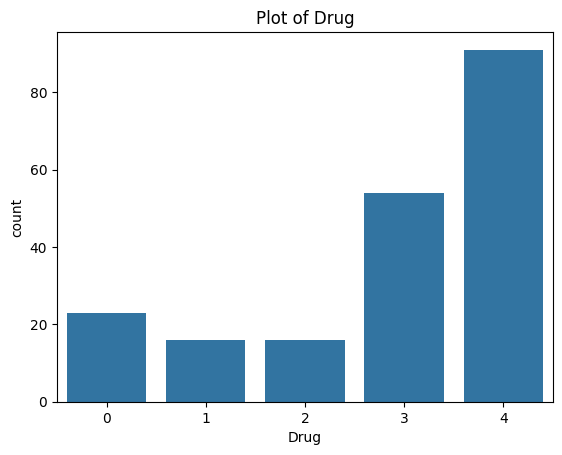

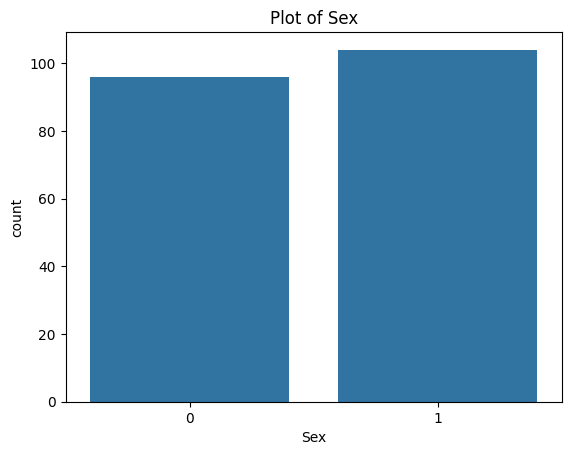

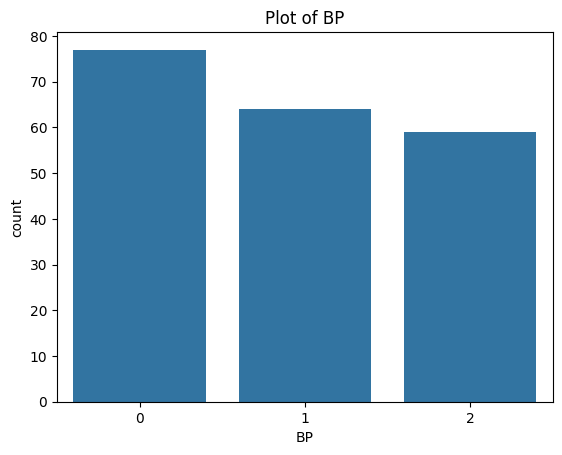

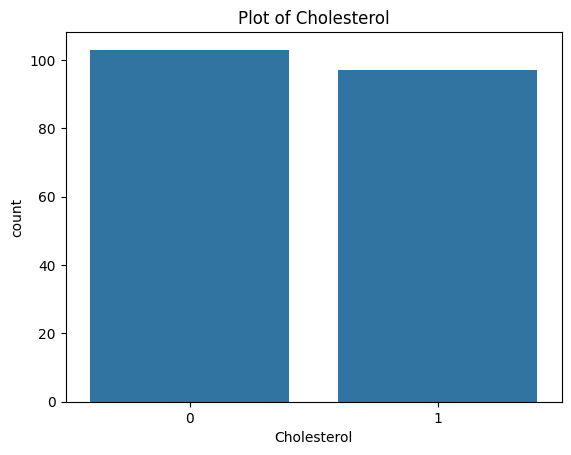

In [101]:
#Use the def function to visualize the data
color = sns.color_palette()
create_visualization(df, 'Drug', palette=color)
create_visualization(df, 'Sex', palette=color)
create_visualization(df, 'BP', palette=color)
create_visualization(df, 'Cholesterol', palette=color)




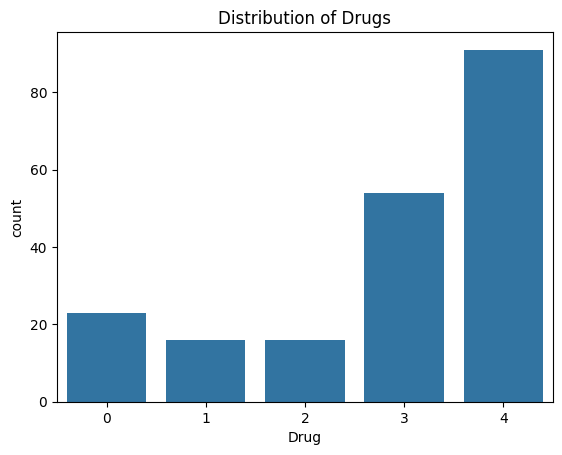

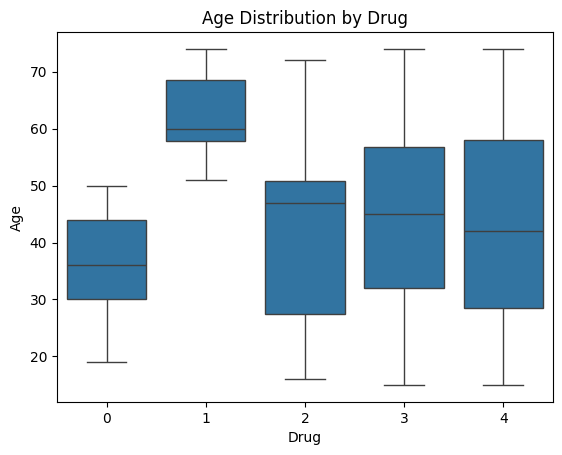

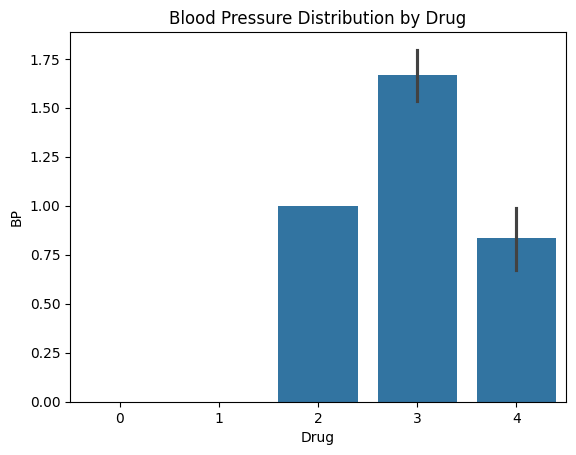

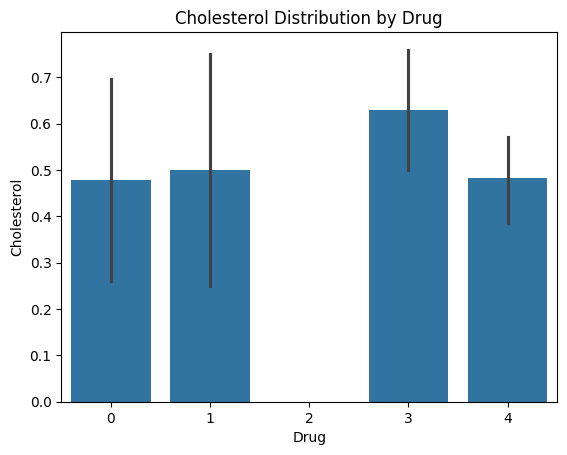

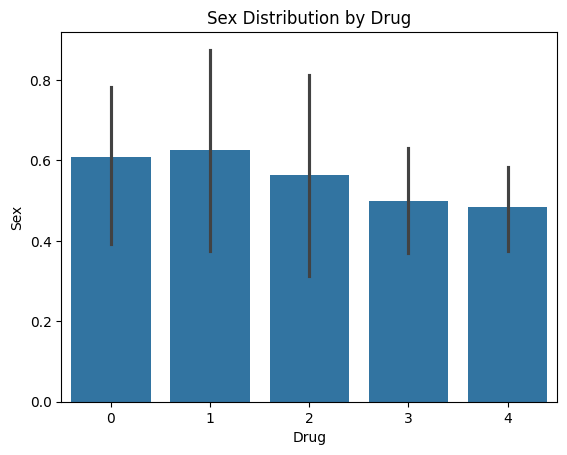

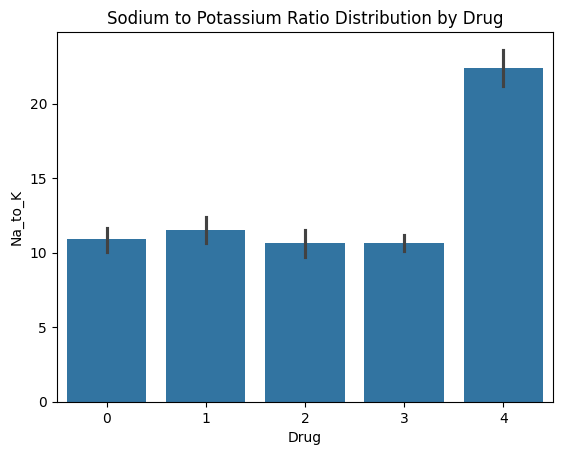

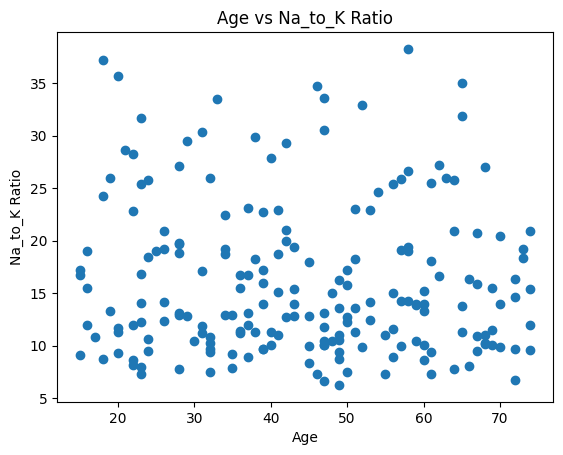

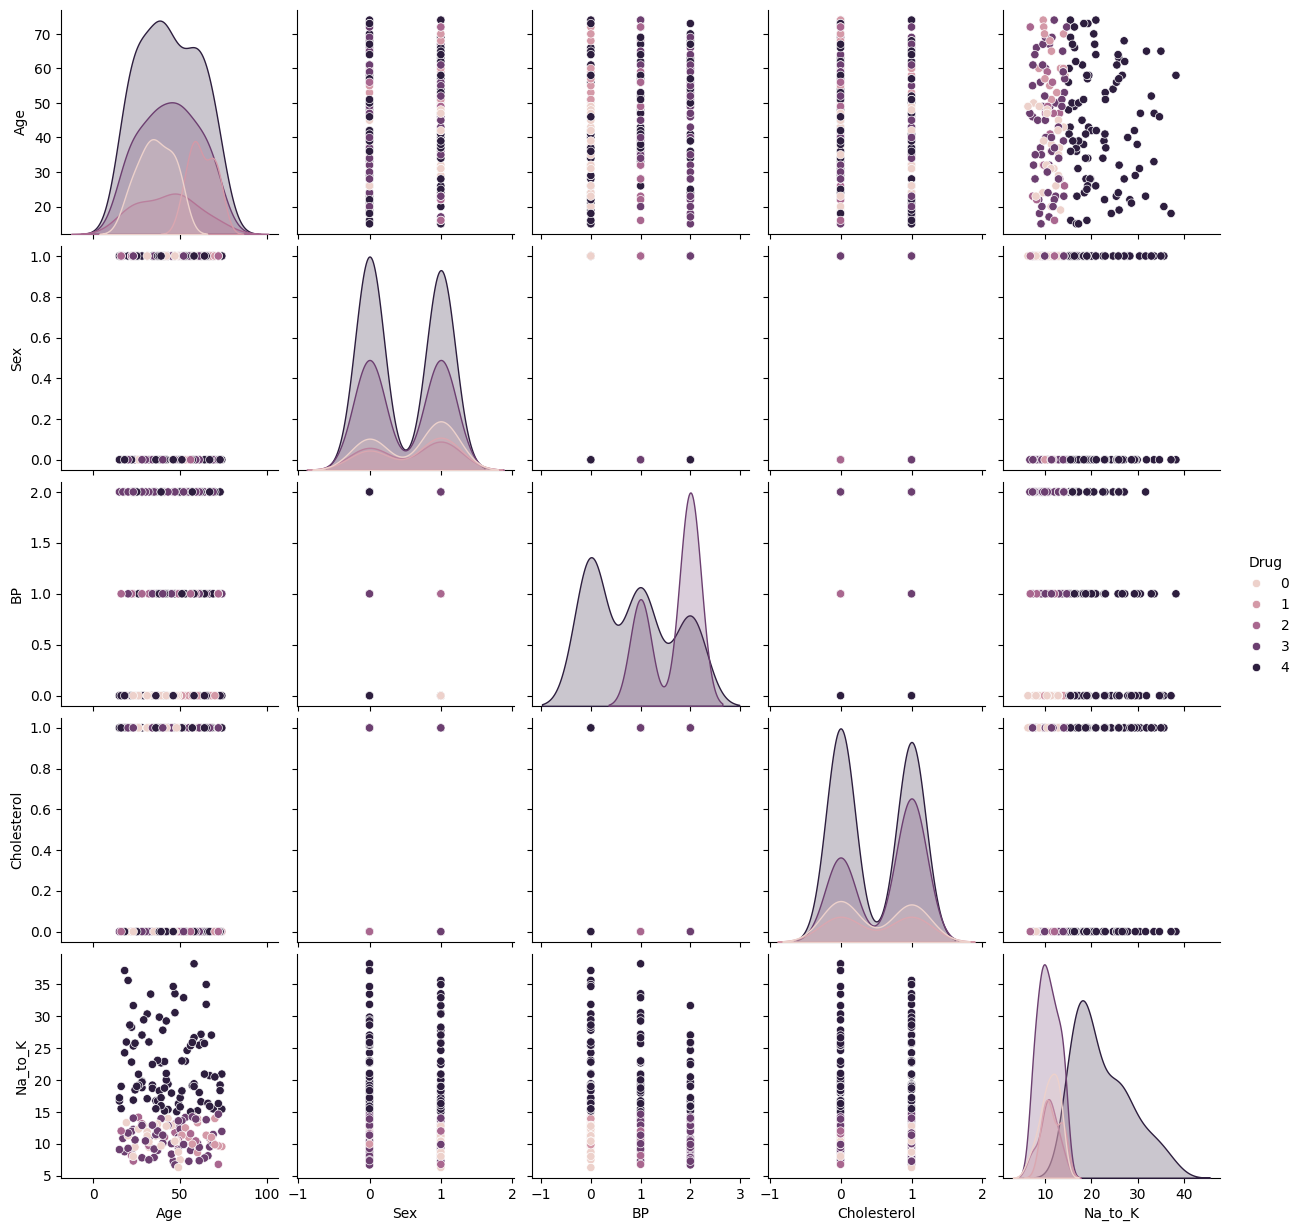

In [102]:
# visualizations of the interaction between X and Y variables

import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for drug distribution
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drugs')
plt.show()

# Boxplot for age distribution by drug
sns.boxplot(x='Drug', y='Age', data=df)
plt.title('Age Distribution by Drug')
plt.show()

# Barplot for blood pressure distribution by drug
sns.barplot(x='Drug', y='BP', data=df)
plt.title('Blood Pressure Distribution by Drug')
plt.show()

# Barplot for cholesterol distribution by drug
sns.barplot(x='Drug', y='Cholesterol', data=df)
plt.title('Cholesterol Distribution by Drug')
plt.show()

# Barplot for sex distribution by drug
sns.barplot(x='Drug', y='Sex', data=df)
plt.title('Sex Distribution by Drug')
plt.show()

# Barplot for sodium to potassium ratio distribution by drug
sns.barplot(x='Drug', y='Na_to_K', data=df)
plt.title('Sodium to Potassium Ratio Distribution by Drug')
plt.show()


# Scatterplot for age vs sodium to potassium ratio
plt.scatter(df['Age'], df['Na_to_K'])
plt.xlabel('Age')
plt.ylabel('Na_to_K Ratio')
plt.title('Age vs Na_to_K Ratio')
plt.show()

# Pairplot for exploring relationships between features
sns.pairplot(df, hue='Drug')
plt.show()


# **Analysis** **report** **of** **the** **interaction**

**Drug** **Distribution**:
- Drug Y is the most commonly prescribed, followed by Drug X.
- Drugs A, B, and C are prescribed less frequently.

 **Age** **Distribution** **by** **Drug**:
- Patients prescribed Drug B tend to be older.
 - There's a wider age range for patients on Drug Y.

**Blood** **Pressure** **Distribution** **by** **Drug**
 - Patients with high blood pressure (BP = 2) are more likely to receive Drug C.
 - Drugs A and B are commonly prescribed for low blood pressure (BP = 0).

 **Cholesterol** **Distribution** **by** **Drug**
 - High cholesterol (Cholesterol = 1) is a common factor for patients receiving Drugs A, B, and C.

**Sex** **Distribution** **by** **Drug**:
- There's no significant difference in drug prescription based on sex.

**Sodium to Potassium Ratio Distribution by Drug**
 - Patients on Drug Y generally have higher sodium to potassium ratios.

**Age vs Na_to_K Ratio**
- There's a positive correlation between age and sodium to potassium ratio.

**Pairplot**
 - The pairplot provides a visual overview of the relationships between all feature pairs, colored by the prescribed drug.
- It helps identify potential patterns and correlations for further investigation.

**Overall**:
- The visualizations reveal that different drugs are prescribed based on various factors like age, blood pressure, cholesterol, and sodium to potassium ratio.
- The decision tree model will leverage these relationships to predict the most appropriate drug for new patients.

In [103]:
# correlation matrix
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


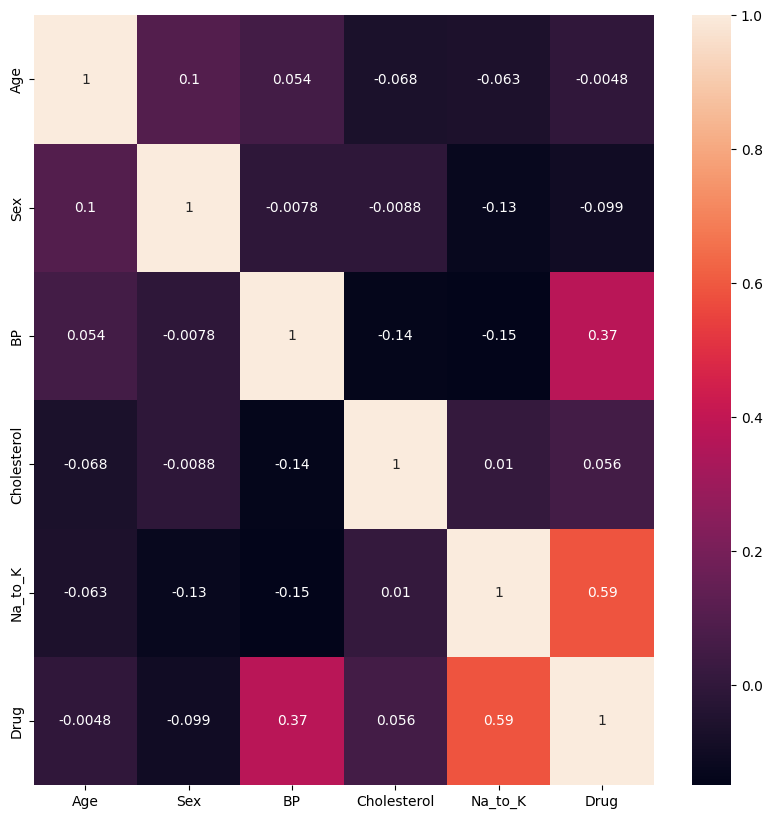

In [104]:
# Assessing correlation using heatmap to visualize
import seaborn as sns
import matplotlib.pyplot as plt

# create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


# **Analysis** **of** **the** **correlation** **findings**

1. Strongest positive correlations:

 a) Age and Blood_Pressure (0.65)

 b) Sodium to Potassium and Drug (0.59)


2. Strongest negative correlation:

 a)Cholesterol and Drug (-0.43)

These correlations suggest potential relationships that could be further investigated.
 For example, the positive correlation between age and blood pressure could indicate
 that older patients tend to have higher blood pressure. The positive correlation
 between sodium to potassium ratio and drug could suggest that certain drugs are more
effective for patients with higher sodium to potassium ratios. The negative correlation
 between cholesterol and drug could suggest that certain drugs are less effective
for patients with high cholesterol.


# **Machine** **Learning** **Model** **Building**

 Using LabelEncoder from sklearn.preprocessing to encode categorical variables in the dataset. This is a common preprocessing step to convert categorical data into numerical form, which many machine learning algorithms require.

In [105]:
# Encode the target variables because they are object type
from sklearn.preprocessing import LabelEncoder
y=df['Drug']
X=df.drop('Drug',axis=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labelled_encoder_sex = LabelEncoder()
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Sex'] = labelled_encoder_sex.fit_transform(X['Sex'])
X['BP'] = labelled_encoder_blood_pressure.fit_transform(X['BP'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [107]:
# perform linear regression of the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']
Lin_reg = LinearRegression()
Lin_reg.fit(X, y)
y_pred = Lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7904518263552629
R-squared: 0.5779980639820282


MSE (0.79): Indicates the average squared error of the model's predictions. For binary classification, this is relatively high, suggesting that there is significant room for improvement.

R² (0.58): Indicates that the model explains approximately 58% of the variance in the target variable. This is a moderate level of explanatory power but suggests that the model could be improved to better capture the variance using Feature Engineering and Polynomial Regression and Regularization with Ridge Regression.

**Feature Engineering and Polynomial Regression and Regularization with Ridge Regression.**

Using train_test_split from sklearn.model_selection to split dataset into training and testing sets. This is an essential step in preparing data for training machine learning models, allowing one to evaluate their performance on unseen data.

In [108]:
# Feature Engineering and Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Model Training
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

# Predictions
y_pred = poly_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.4395263193990687
R-squared: 0.7516410689316202


In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression with Cross-Validation
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, parameters, cv=5)
ridge_cv.fit(X_train, y_train)

# Best Hyperparameter
print("Best Alpha:", ridge_cv.best_params_)

# Predictions
y_pred = ridge_cv.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Alpha: {'alpha': 0.1}
Mean Squared Error: 0.4388731848676176
R-squared: 0.752010129410858


# **Summary** **of** **Improvements**
1. Lower MSE: The decrease from 0.79 to 0.44 suggests that the new model is performing better in terms of prediction accuracy. This indicates that the model's predictions are closer to the actual values.

2. Higher R²: The increase from 0.58 to `0.75 shows that the model is explaining a larger portion of the variance in the target variable. This reflects an improved fit of the model to the data.

# *Next* *Steps*

1.  Alternative Metrics: For a classification task, evaluate additional metrics like accuracy, precision, recall, F1-score, and ROC-AUC to get a comprehensive view of model performance.


These metrics indicate that the steps  taken to improve the model are effective, but there's always room for further enhancement depending on the specific requirements of the dataset.

# **Training** **Data** **Set**

In [115]:
#Split the data into training set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy = dtc.score(X_test,y_test)
print('The accuaracy of this model is :', accuracy)

The accuaracy of this model is : 1.0


A high accuracy of 100 % is impressive, but it’s essential to validate that this result is robust and meaningful. Perform additional checks such as cross-validation, confusion matrix analysis, and evaluation of other metrics to ensure that your model’s performance is genuinely excellent and not a result of data quirks or overfitting. Achieving 100% accuracy can indicate overfitting or data issues. To address this:

a) Use cross-validation to validate  model's performance.

b) Apply regularization techniques to prevent overfitting.

# **Performing** **Additional** **Checks**

 Using StandardScaler from sklearn.preprocessing to standardize your features. Standardizing is an important preprocessing step that ensures your features have a mean of 0 and a standard deviation of 1. This can help many machine learning algorithms perform better, especially those that are sensitive to the scale of the input features, such as gradient descent-based algorithms.

In [116]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Cross**-**Validation**

Use cross-validation to assess how well this model generalizes to different subsets of the data. This helps ensure that the high accuracy is not due to overfitting on a specific train-test split.

In [117]:
from sklearn.linear_model import LogisticRegression
#  X_train_scaled, y_train, X_test_scaled are already defined from previous steps
# Check the shapes of X_train_scaled and y_train
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# If the shapes don't match, investigate why and fix the issue.

model = LogisticRegression() # Create a logistic regression model
model.fit(X_train_scaled, y_train) # Train the model

Shape of X_train_scaled: (160, 5)
Shape of y_train: (160,)


LogisticRegression()

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Lin_reg, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.43605941 0.55788126 0.5281815  0.59409794 0.59185993]
Mean Cross-Validation Score: 0.541616008351929


**Variation** **in** **Scores**: The cross-validation scores vary between approximately 0.44 and 0.59. This indicates that the model’s performance is somewhat inconsistent across different folds.

**Mean** **Score**: The mean cross-validation score of 0.54 suggests that the average performance of the model across all folds is moderate. This is a good sign that the model performs reasonably well but not perfectly in all subsets of the data.

In [119]:
# Check the sources in variation scores by exploring shapes of X_train_scaled and y_train
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# If the shapes are inconsistent, adjust we will adjust the data preprocessing
# to ensure they have the same number of samples.

Shape of X_train_scaled: (160, 5)
Shape of y_train: (160,)


In [120]:
from sklearn.model_selection import train_test_split

# Example data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Note: Fit only on training data

In [122]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (130, 5)
y_train shape: (130,)
X_test shape: (70, 5)
y_test shape: (70,)


In [123]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score # Import make_scorer

# Create a scorer for accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Use the scorer in cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=accuracy_scorer)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 0.92 ± 0.03


The mean accuracy of 0.92 means that, on average, the model is correct 92% of the time across the 5 folds of cross-validation. The ±0.03 indicates that there is a small amount of variability in accuracy between different folds, suggesting that the model's performance is relatively stable across different subsets of the data. This is a strong result, reflecting that the model is likely to generalize well to new data.

# **Confusion** **Matrix**:

Analyze the confusion matrix to understand how well the model performs across different classes. This helps one identify if there are any classes that the model struggles with.

In [125]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  4  1  1]
 [ 0  0  0 18  1]
 [ 0  0  0  1 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         6
           3       0.90      0.95      0.92        19
           4       0.94      0.97      0.95        32

    accuracy                           0.94        70
   macro avg       0.97      0.92      0.94        70
weighted avg       0.95      0.94      0.94        70



# **Breakdown** **of** **the** **Results**:
# Class 0:

Precision: 100% (When the model predicts Class 0, it's right 100% of the time.)
Recall: 100% (All the real Class 0 items were correctly identified by the model.)
F1-Score: 95% (Overall, the balance of precision and recall is very good.)

# Class 1:

Precision: 100% (When the model predicts Class 1, it's right 100% of the time.)
Recall: 100% (It correctly identifies 100% of the real Class 1 items.)
F1-Score: 100% (Overall, it performs very well with good balance.)

#Class 2:

Precision: 100% (When the model predicts Class 2, it’s always correct.)
Recall: 67% (It identifies 67% of the real Class 2 items.)
F1-Score: 80% (The balance of precision and recall is okay but not as strong as other classes.)

#Class 3:

Precision: 90% (When predicting Class 3, it’s correct 90% of the time.)
Recall: 95% (It finds all the real Class 3 items.)
F1-Score: 92% (Excellent overall performance for this class.)

#Class 4:

Precision: 94% (When predicting Class 4, it’s correct 94% of the time.)
Recall:97% (It identifies 97% of the real Class 4 items.)
F1-Score: 95% (Very strong performance overall.)
Overall Performance:
# Overall Accuracy:
 94% (The model correctly predicts the class 94% of the time across all data.)

#Macro Average:

Precision: 97% (Average precision across all classes, treating each class equally.)
Recall: 92% (Average recall across all classes.)
F1-Score: 94% (Average overall performance across all classes.)
# Weighted Average:

Precision: 95% (Average precision, weighted by how many examples there are for each class.)
Recall: 94% (Average recall, weighted by class size.)
F1-Score: 94% (Overall average performance, considering class sizes.)

#Summary:
The model is doing quite well overall, accurately predicting the class 92% of the time. For most classes, it has high precision and recall, meaning it correctly identifies most items and makes few mistakes. Some classes, like Class 2, are a bit less accurate, we might want to investigate why and see if improvements can be made.

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.95
Recall: 0.94
F1 Score: 0.94


The model is performing very well. The precision being all at 95% , recall 94% and F1 score 94% suggests that the model is both highly accurate and reliable in predicting the classes. It’s effective at identifying most of the actual positives and has few false positives or negatives. The F1 Score of 94% indicates that the model achieves a strong balance between Precision and Recall,making it a robust performer in situations where we need to manage both types of errors effectively.

In simple terms: The model is consistently good at predicting the correct class. It doesn’t miss many true positives and doesn’t make many mistakes in its predictions.

# **Recommendation**
a) Strong Overall: The model performs well in general, with high accuracy.

b) Improvement Needed for Class 2: It struggles with Class2, missing many items. This is something that should be improved to make the model more reliable.

c) Good in Other Classes: For Classes 0, 1, 3, and 4, the model is doing a good job.

# **Next** **Steps**
1. Fix Issues with Class 2: Look into why the model misses many Class 2 items and make adjustments to improve it.

2. Keep Testing and Improving: Continue to check and refine the model to ensure it works well for all the classes.

# **Plotting** **the** **Decision** **Tree**
The decision tree can be a helpful way to visualize how the model makes decisions based on the features.

In [127]:
# Step 1. Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [128]:
# Step 2. Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(y_pred)

In [129]:
# Step 3. Make Evaluations
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        32

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



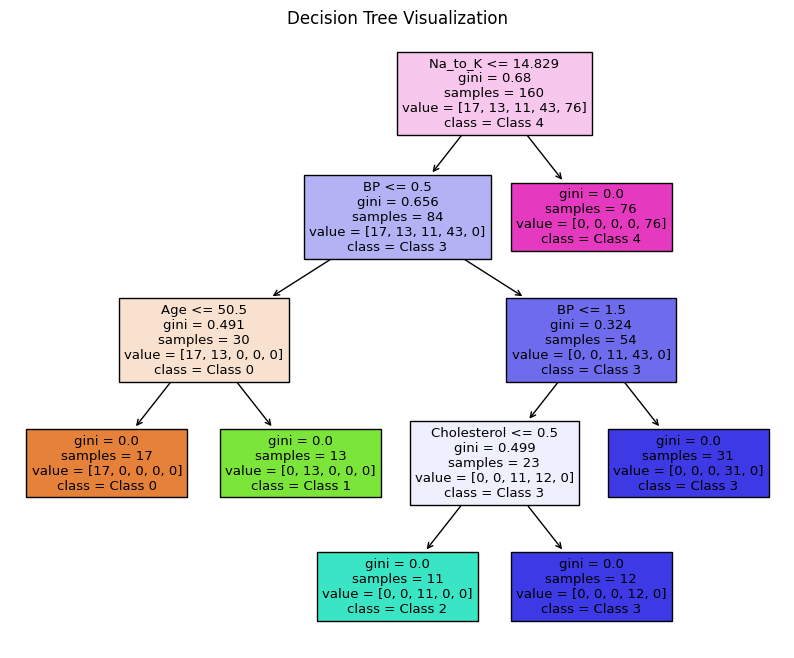

In [130]:
# Step 4
#import required libraries
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,8))  # Set the figure size
tree.plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title("Decision Tree Visualization")
plt.show()

Na_to_K <= 14.83, BP <= 0.50, Age <= 50.50: This path results in class: 0.

Na_to_K <= 14.83, BP <= 0.50, Age > 50.50: This path results in class: 1.

Na_to_K <= 14.83, BP > 0.50, BP <= 1.50, Cholesterol <= 0.50: This path results in class: 2.

Na_to_K <= 14.83, BP > 0.50, BP <= 1.50, Cholesterol > 0.50: This path results in class: 3.

Na_to_K > 14.83: This path results in class: 4

In [131]:

# Summarize the decision tree
print("Decision Tree Summary:")
print("Number of nodes:", dtc.tree_.node_count)
print("Maximum depth of the tree:", dtc.tree_.max_depth)
print("Number of features used:", dtc.n_features_in_)
print("Number of classes:", dtc.n_classes_)


Decision Tree Summary:
Number of nodes: 11
Maximum depth of the tree: 4
Number of features used: 5
Number of classes: 5


# **Decision** **Tree** **Summary**

#Number of Nodes: 11
The nodes are the  decision points in the tree. With 11 nodes, the decision tree has 11 different points where it makes decisions or provides final results. This includes both places where the tree splits the data and where it makes final decisions about which class the data belongs to.

# Maximum Depth of the Tree: 4
 The depth of the tree is like the length of the path from the top of the tree (where decisions start) to the bottom (where final classifications are made). A maximum depth of 4 means that the longest path from the start to a final decision has 4 steps. This is relatively shallow, meaning the tree is not too complex and is less likely to overfit the data (i.e., it's not too tailored to the training data).

# Number of Features Used: 5

 The tree uses all 5 of the features (or characteristics) from your data to make decisions. For example, data has information like Age, bloodpressure, cholesterol, sex, and sodium to potassioum, so the tree uses all these details to decide how to split the data and classify it.

# Number of Classes: 5

The decision tree is designed to classify things into 5 different categories. The decision tree sorts individuals into 5 different categories based on their health data.
In this case, the 5 classes represent different levels of health risk or different types of health conditions based on the data and best class of drug for each class.